# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**Read in the data**

In [2]:
teacher_reality = pd.read_csv('../data/cleaned_teacherreality_posts.csv')

In [3]:
teacher_reality.head()

,created_utc,title,self_text,subreddit
0,1.643107e+09,How to escape from Teaching to Tech: an easy g...,##Why?\n\n- High employment\n- Huge salaries\n...,TeacherReality
1,1.697400e+09,"Teachers, Immorality, and Getting Fired?",Have you ever known a teacher who was fired ov...,TeacherReality
2,1.697257e+09,My age is impacting my authority?,Hello! I’m a 20yr old female dance teacher who...,TeacherReality
3,1.696288e+09,8th graders throwing pencils every day,"Hi. I'm a middle school art teacher , and alth...",TeacherReality
4,1.695876e+09,Tonight I was scolded by a parent for telling ...,I am a high school music teacher who often tak...,TeacherReality


In [4]:
teacher_reality.shape

(4656, 4)

In [5]:
mental_health = pd.read_csv('../data/cleaned_mentalhealth_posts.csv')

In [6]:
mental_health.head()

,created_utc,title,self_text,subreddit
0,1.697465e+09,I DID IT!!!,I DID IT!! I COMMUNICATED MY FEELINGS IN A HEA...,mentalhealth
1,1.697444e+09,Can porn be healthy?,18M here\nSo my question is whether porn consu...,mentalhealth
2,1.697469e+09,what are things that get you emotionally high?,something that got me so emotionally high was ...,mentalhealth
3,1.697480e+09,I constantly think people dislike me or hate m...,Just the title. I see myself doing it but it's...,mentalhealth
4,1.697485e+09,How do you overcome depression if the environm...,I live in a small town of 42.000 people and th...,mentalhealth


In [7]:
mental_health.shape

(4965, 4)

# Compare Title & Post Lengths

**Teacher Reality**

In [9]:
teacher_reality_title_and_text = teacher_reality.drop(columns= ['created_utc', 'subreddit'])

In [10]:
teacher_reality_title_and_text['title_length'] = teacher_reality_title_and_text['title'].apply(len)
teacher_reality_title_and_text['title_word_count'] = teacher_reality_title_and_text['title'].str.split().str.len()

teacher_reality_title_and_text['text_length'] = teacher_reality_title_and_text['self_text'].apply(len)
teacher_reality_title_and_text['text_word_count'] = teacher_reality_title_and_text['self_text'].str.split().str.len()
teacher_reality_title_and_text.head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
0,How to escape from Teaching to Tech: an easy g...,##Why?\n\n- High employment\n- Huge salaries\n...,50,10,5088,853
1,"Teachers, Immorality, and Getting Fired?",Have you ever known a teacher who was fired ov...,40,5,524,92
2,My age is impacting my authority?,Hello! I’m a 20yr old female dance teacher who...,33,6,1652,318
3,8th graders throwing pencils every day,"Hi. I'm a middle school art teacher , and alth...",38,6,882,167
4,Tonight I was scolded by a parent for telling ...,I am a high school music teacher who often tak...,70,14,1032,191


**Let's take a look at the min and max titles by word count and by text count:**

In [11]:
teacher_reality_title_and_text.sort_values(by='title_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
4483,Unions??,"Hello fellow teachers,\n\nI have been reading ...",8,1,692,126
2092,Unions??,"Hello fellow teachers,\n\nI have been reading ...",8,1,692,126
1531,Thanks!,This sub has grown so fast. Pretty obvious di...,7,1,679,130
4592,Thanks!,This sub has grown so fast. Pretty obvious di...,7,1,679,130
24,R/teachers,What happened to the teachers community? Sudde...,10,1,58,8


In [12]:
teacher_reality_title_and_text.sort_values(by='title_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
4479,I left in 2021 after seven years. I took a job...,Title pretty much says it all. I can’t imagine...,209,39,165,31
4142,I left in 2021 after seven years. I took a job...,Title pretty much says it all. I can’t imagine...,209,39,165,31
3468,I left in 2021 after seven years. I took a job...,Title pretty much says it all. I can’t imagine...,209,39,165,31
3805,I left in 2021 after seven years. I took a job...,Title pretty much says it all. I can’t imagine...,209,39,165,31
4200,1 semester away from my degree in Music. I hav...,I haven't been in a teaching role in quite awh...,210,38,1541,288


> _The longest title had 39 words in it and the shortest title had 1 word in it_

In [13]:
teacher_reality_title_and_text.sort_values(by='text_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
2734,A new book captures the reality of teacher work,[https://www.forbes.com/sites/petergreene/2023...,47,9,236,1
1903,A new book captures the reality of teacher work,[https://www.forbes.com/sites/petergreene/2023...,47,9,236,1
662,A new book captures the reality of teacher work,[https://www.forbes.com/sites/petergreene/2023...,47,9,236,1
688,74% of Connecticut teachers consider quitting,[https://cea.org/school-crisis-74-of-teachers-...,45,6,146,1
70,74% of Connecticut teachers consider quitting,[https://cea.org/school-crisis-74-of-teachers-...,45,6,146,1


In [15]:
teacher_reality_title_and_text.sort_values(by='text_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
3868,Abuse is The Norm in Teaching - My Experience,I posted about this in the SpEd and Teachers f...,45,9,11666,2252
4205,Abuse is The Norm in Teaching - My Experience,I posted about this in the SpEd and Teachers f...,45,9,11666,2252
1844,Abuse is The Norm in Teaching - My Experience,I posted about this in the SpEd and Teachers f...,45,9,11666,2252
4542,Abuse is The Norm in Teaching - My Experience,I posted about this in the SpEd and Teachers f...,45,9,11666,2252
3531,Abuse is The Norm in Teaching - My Experience,I posted about this in the SpEd and Teachers f...,45,9,11666,2252


> _The longest text had 2,252 words in it and the shortest title had 1 word in it_

In [20]:
teacher_reality_title_and_text['title_length'].mean()

51.62972508591065

In [21]:
teacher_reality_title_and_text['title_word_count'].mean()

9.184278350515465

In [25]:
teacher_reality_title_and_text['text_length'].mean()

1072.8797250859106

In [26]:
teacher_reality_title_and_text['text_word_count'].mean()

191.51503436426117

**Let's take a look at visuals to show the distributions of title and text lengths by word count and length:**

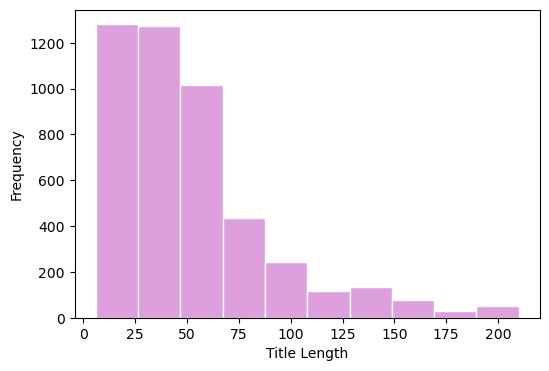

In [45]:
plt.figure(figsize= (6,4))
plt.hist(teacher_reality_title_and_text['title_length'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Length')
plt.ylabel('Frequency');

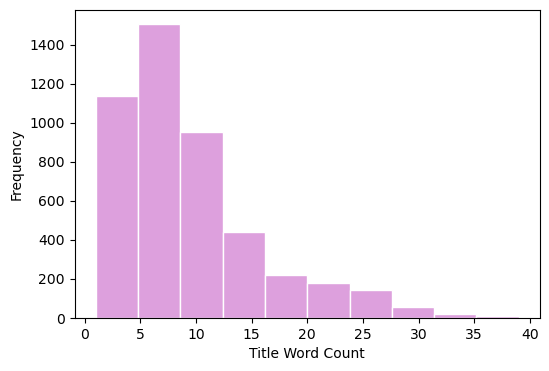

In [29]:
plt.figure(figsize= (6,4))
plt.hist(teacher_reality_title_and_text['title_word_count'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Word Count')
plt.ylabel('Frequency');

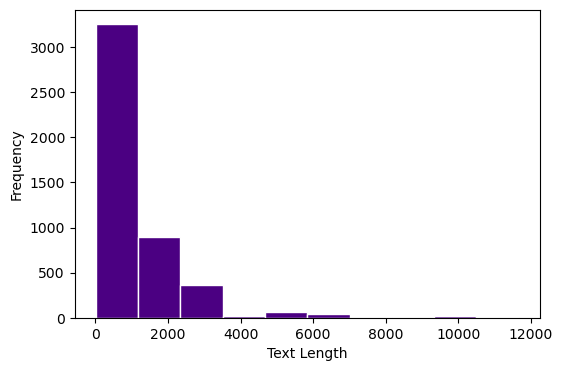

In [31]:
plt.figure(figsize= (6,4))
plt.hist(teacher_reality_title_and_text['text_length'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Length')
plt.ylabel('Frequency');

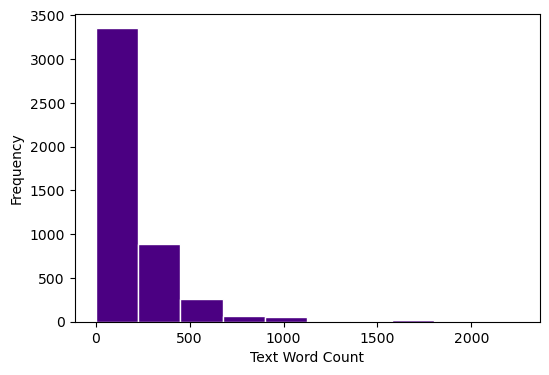

In [33]:
plt.figure(figsize= (6,4))
plt.hist(teacher_reality_title_and_text['text_word_count'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Word Count')
plt.ylabel('Frequency');

>_All 4 of the ditributions above are scewed right, meaning that longer titles/texts are not the majority._

**Mental Health**

In [34]:
mental_health_title_and_text = mental_health.drop(columns= ['created_utc', 'subreddit'])

In [35]:
mental_health_title_and_text['title_length'] = mental_health_title_and_text['title'].apply(len)
mental_health_title_and_text['title_word_count'] = mental_health_title_and_text['title'].str.split().str.len()

mental_health_title_and_text['text_length'] = mental_health_title_and_text['self_text'].apply(len)
mental_health_title_and_text['text_word_count'] = mental_health_title_and_text['self_text'].str.split().str.len()
mental_health_title_and_text.head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
0,I DID IT!!!,I DID IT!! I COMMUNICATED MY FEELINGS IN A HEA...,11,3,736,139
1,Can porn be healthy?,18M here\nSo my question is whether porn consu...,20,4,588,115
2,what are things that get you emotionally high?,something that got me so emotionally high was ...,46,8,327,58
3,I constantly think people dislike me or hate m...,Just the title. I see myself doing it but it's...,146,28,796,148
4,How do you overcome depression if the environm...,I live in a small town of 42.000 people and th...,93,17,132,27


**Let's take a look at the min and max titles by word count and by text count:**

In [36]:
mental_health_title_and_text.sort_values(by='title_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
3131,Post-Graduation,"Hey, I've graduated 4 months ago and yesterday...",15,1,897,184
4329,Struggling,I am a university student. I have always studi...,10,1,521,102
1336,Depression?,Lately I’ve been feeling completely empty.I fe...,11,1,415,75
317,Depression/confused,Do you ever feel so sadden by the pain in the ...,19,1,670,133
152,Post-Graduation,"Hey, I've graduated 4 months ago and yesterday...",15,1,897,184


In [37]:
mental_health_title_and_text.sort_values(by='title_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
3684,I think of my problem is I try to make my brai...,Should I think about other things and acknowle...,268,56,72,12
1698,I think of my problem is I try to make my brai...,Should I think about other things and acknowle...,268,56,72,12
705,I think of my problem is I try to make my brai...,Should I think about other things and acknowle...,268,56,72,12
4677,I think of my problem is I try to make my brai...,Should I think about other things and acknowle...,268,56,72,12
2691,I think of my problem is I try to make my brai...,Should I think about other things and acknowle...,268,56,72,12


> _The longest title had 56 words in it and the shortest title had 1 word in it_

In [38]:
mental_health_title_and_text.sort_values(by='text_word_count').head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
2648,Sharing my energy,[https://www.reddit.com/user/BusHelpful6163/co...,17,3,279,1
1534,where and how do you get the motivation and st...,Tired,151,32,5,1
3520,where and how do you get the motivation and st...,Tired,151,32,5,1
3999,Is it possible to develop autism later in life...,?,89,18,1,1
27,Is it possible to develop autism later in life...,?,89,18,1,1


In [39]:
mental_health_title_and_text.sort_values(by='text_word_count', ascending=False).head()

,title,self_text,title_length,title_word_count,text_length,text_word_count
1248,i really want to do something silly,TW: SH\r \n\r \nthis i so long im really sor...,35,7,10570,2187
255,i really want to do something silly,TW: SH\r \n\r \nthis i so long im really sor...,35,7,10570,2187
3234,i really want to do something silly,TW: SH\r \n\r \nthis i so long im really sor...,35,7,10570,2187
4227,i really want to do something silly,TW: SH\r \n\r \nthis i so long im really sor...,35,7,10570,2187
2241,i really want to do something silly,TW: SH\r \n\r \nthis i so long im really sor...,35,7,10570,2187


> _The longest text had 2,187 words in it and the shortest title had 1 word in it_

In [41]:
mental_health_title_and_text['title_length'].mean()

44.6797583081571

In [42]:
mental_health_title_and_text['title_word_count'].mean()

8.34944612286002

In [43]:
mental_health_title_and_text['text_length'].mean()

1202.154078549849

In [44]:
mental_health_title_and_text['text_word_count'].mean()

229.8882175226586

**Let's take a look at visuals to show the distributions of title and text lengths by word count and length:**

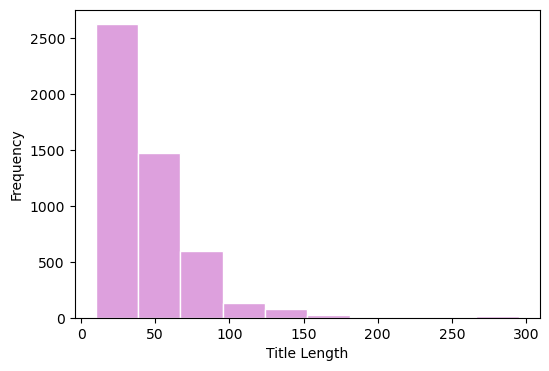

In [46]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['title_length'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Length')
plt.ylabel('Frequency');

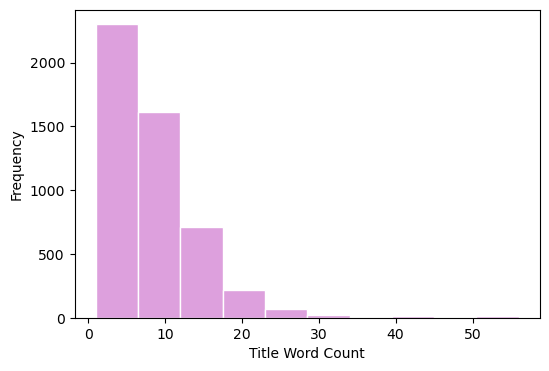

In [47]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['title_word_count'], bins = 10, color = 'plum', edgecolor = 'white')
plt.xlabel('Title Word Count')
plt.ylabel('Frequency');

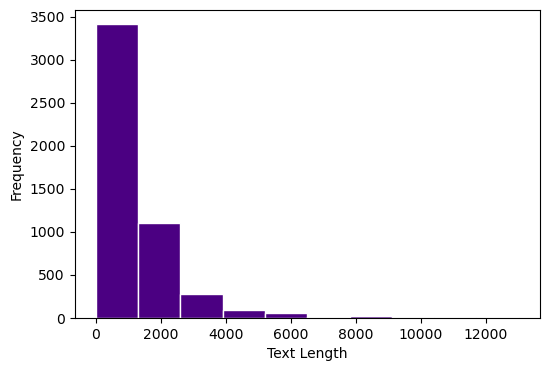

In [48]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['text_length'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Length')
plt.ylabel('Frequency');

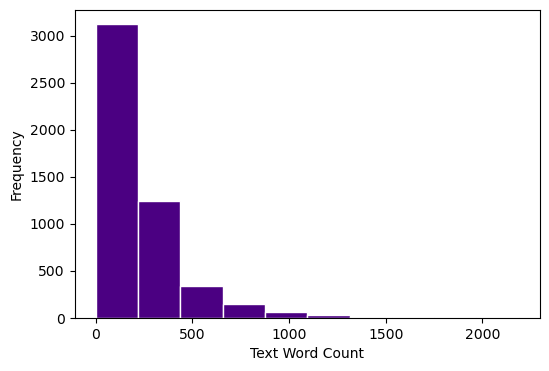

In [49]:
plt.figure(figsize= (6,4))
plt.hist(mental_health_title_and_text['text_word_count'], bins = 10, color = 'indigo', edgecolor = 'white')
plt.xlabel('Text Word Count')
plt.ylabel('Frequency');

>_Similar to teacher_reality, all 4 of the ditributions above are scewed right, meaning that longer titles/texts are not the majority._

# Compare Common Words

Let's visualize the most common words from both data sets and see compare the two. I am going to use CountVectorizer on both data sets to convert the text into a more structured df for EDA.  

# Compare Sentiment Analysis